In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('Dataset/france/tes_france.csv')
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,Marseille,Toulouse,23.0,5.0,10.0,1.0,5.0,1.0,7.0,20.0,1.0,3.0,0.0,0.0,1.0,0.0,H
1,Angers,Nimes,21.0,14.0,7.0,5.0,5.0,1.0,20.0,12.0,2.0,2.0,0.0,1.0,1.0,1.0,A
2,Lille,Rennes,15.0,8.0,6.0,2.0,2.0,6.0,12.0,13.0,1.0,0.0,0.0,0.0,1.0,1.0,H
3,Montpellier,Dijon,16.0,9.0,7.0,4.0,4.0,2.0,15.0,21.0,2.0,2.0,0.0,0.0,1.0,0.0,A
4,Nantes,Monaco,16.0,11.0,4.0,6.0,7.0,2.0,8.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,Niort,Valenciennes,8.0,9.0,2.0,4.0,4.0,3.0,9.0,14.0,0.0,0.0,0.0,0.0,1.0,1.0,A
2833,Paris FC,Grenoble,14.0,8.0,4.0,4.0,4.0,4.0,8.0,11.0,0.0,3.0,0.0,0.0,0.0,0.0,H
2834,Quevilly Rouen,Dunkerque,13.0,4.0,5.0,3.0,2.0,4.0,13.0,12.0,1.0,1.0,0.0,0.0,1.0,1.0,H
2835,Rodez,Caen,9.0,10.0,3.0,5.0,9.0,4.0,8.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,H


In [3]:
le=LabelEncoder()
dataset['HomeTeam']=le.fit_transform(dataset['HomeTeam'])
dataset['AwayTeam']=le.fit_transform(dataset['AwayTeam'])
dataset['FTR']=le.fit_transform(dataset['FTR'])

In [4]:
dataset

,HomeTeam,AwayTeam,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HTHG,HTAG,FTR
0,23,44,23.0,5.0,10.0,1.0,5.0,1.0,7.0,20.0,1.0,3.0,0.0,0.0,1.0,0.0,2
1,3,30,21.0,14.0,7.0,5.0,5.0,1.0,20.0,12.0,2.0,2.0,0.0,1.0,1.0,1.0,0
2,20,39,15.0,8.0,6.0,2.0,2.0,6.0,12.0,13.0,1.0,0.0,0.0,0.0,1.0,1.0,2
3,26,13,16.0,9.0,7.0,4.0,4.0,2.0,15.0,21.0,2.0,2.0,0.0,0.0,1.0,0.0,0
4,28,25,16.0,11.0,4.0,6.0,7.0,2.0,8.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,31,46,8.0,9.0,2.0,4.0,4.0,3.0,9.0,14.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2833,33,15,14.0,8.0,4.0,4.0,4.0,4.0,8.0,11.0,0.0,3.0,0.0,0.0,0.0,0.0,2
2834,36,14,13.0,4.0,5.0,3.0,2.0,4.0,13.0,12.0,1.0,1.0,0.0,0.0,1.0,1.0,2
2835,40,9,9.0,10.0,3.0,5.0,9.0,4.0,8.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,2


In [5]:
X = dataset[dataset.columns[0:16]]
Y = dataset['FTR']

In [6]:
 # membagi dataset menjadi training dan testing 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [24]:
y_test.value_counts()

2    223
1    178
0    167
Name: FTR, dtype: int64

In [25]:
y_train.value_counts()

2    954
0    689
1    626
Name: FTR, dtype: int64

In [7]:
grFrance = xgb.XGBClassifier(random_state=10)
grFrance.fit(X_train, y_train)
grFrance_pred = grFrance.predict(X_test)
print("pred", grFrance_pred)  #hasil prediksi 
print("tes", y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, grFrance_pred)*100)

pred [1 2 2 2 2 0 1 2 1 2 1 2 1 2 1 0 1 2 1 1 2 2 0 2 2 2 0 2 2 2 2 0 2 1 0 0 2
 2 2 1 1 1 0 0 2 2 0 1 0 0 0 1 0 0 1 2 2 2 2 2 2 0 0 2 1 1 0 2 1 0 0 1 1 2
 2 0 2 1 2 2 1 0 1 0 2 1 0 0 2 2 0 2 0 0 2 0 2 2 2 0 1 0 2 2 1 0 1 0 0 0 2
 1 1 2 2 2 2 1 2 1 1 2 2 1 1 0 2 2 2 0 2 2 2 1 1 2 2 0 2 1 0 0 0 0 0 2 2 1
 0 0 1 2 0 0 2 2 2 2 1 2 0 2 2 2 2 0 2 0 0 0 2 0 1 0 0 2 1 0 2 0 2 1 1 0 2
 1 2 0 2 2 2 0 2 1 2 1 2 1 2 1 1 2 1 2 0 2 2 2 2 2 0 1 2 0 2 1 1 0 2 1 0 1
 0 1 2 2 0 2 0 1 0 2 1 2 0 0 1 2 2 2 2 2 1 1 0 2 1 1 2 0 2 1 0 1 2 1 1 1 2
 2 0 0 2 1 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 1 0 0 2 2 1 2 2 0 1
 2 2 1 2 1 2 0 2 1 1 2 1 2 2 0 2 0 2 2 2 2 2 0 0 2 0 1 2 2 1 1 0 2 0 1 2 0
 0 0 0 0 0 0 1 1 1 0 2 2 0 1 1 2 1 2 2 0 1 0 2 2 2 0 2 2 0 2 0 2 0 0 2 2 0
 1 2 0 1 1 1 2 1 1 2 0 2 1 1 2 1 0 1 1 2 1 2 0 2 1 0 1 1 1 2 2 2 0 0 1 2 1
 0 2 0 0 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 0 2 2 2 0 2 0 2 2 1 2 2 2 2 1 1 0 1
 0 2 2 0 2 1 2 0 0 1 0 2 2 2 0 2 2 1 2 1 2 2 2 1 1 2 0 1 2 0 0 2 1 2 2 0 2
 1 2 1 2 2 0 1 0 2 2

In [8]:
print(classification_report(y_test,grFrance_pred))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57       167
           1       0.41      0.34      0.38       178
           2       0.63      0.74      0.68       223

    accuracy                           0.56       568
   macro avg       0.54      0.55      0.54       568
weighted avg       0.55      0.56      0.55       568



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, grFrance_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, grFrance_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, grFrance_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, grFrance_pred, average=None)

print("XGBoost")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

XGBoost
Akurasi: 0.5633802816901409
Presisi: [0.5875     0.41496599 0.63218391]
Recall: [0.56287425 0.34269663 0.73991031]
F1-score: [0.57492355 0.37538462 0.68181818]


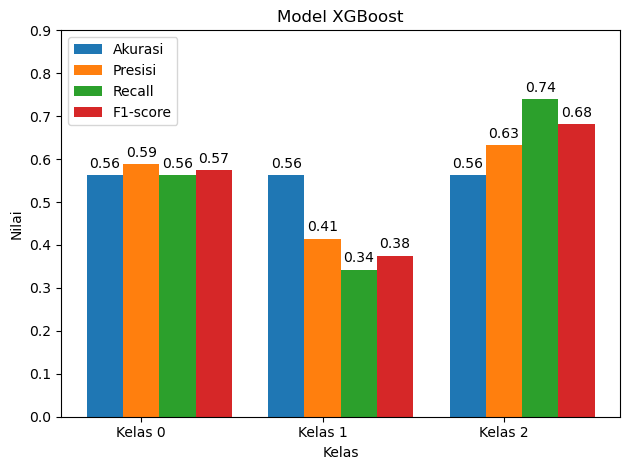

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.5633802816901409
precision = [0.5875, 0.41496599, 0.63218391]
recall = [0.56287425, 0.34269663, 0.73991031]
f1 = [0.57492355, 0.37538462, 0.68181818]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model XGBoost')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 0.9])
plt.tight_layout()
plt.show()

In [11]:
lgbFrance = lgb.LGBMClassifier(random_state=10)
lgbFrance.fit(X_train, y_train)
lgbFrance_pred = lgbFrance.predict(X_test)
print(lgbFrance_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, lgbFrance_pred)*100)

[1 2 2 2 2 0 1 1 1 2 1 2 2 2 1 0 1 1 1 2 2 2 0 2 0 2 1 2 1 2 2 0 2 1 0 0 2
 2 2 2 1 2 0 0 2 2 0 2 0 0 0 2 0 0 1 2 2 2 2 2 2 0 0 2 2 1 0 1 1 0 0 1 1 2
 2 0 2 1 2 2 2 0 1 0 2 1 0 0 2 0 0 2 0 0 2 0 2 1 2 0 1 0 2 2 1 0 0 1 0 0 2
 1 1 0 2 2 2 1 2 1 1 2 2 1 1 0 2 2 2 0 2 2 2 1 2 2 2 1 2 1 1 0 0 1 0 2 2 0
 0 0 1 2 0 0 2 1 2 2 0 2 0 1 2 0 2 1 2 1 0 1 2 0 2 0 0 2 1 2 2 0 2 1 1 0 2
 1 2 0 2 2 2 0 2 1 2 1 2 1 2 1 1 2 1 2 0 2 2 2 2 2 0 0 2 0 2 1 1 0 2 1 0 1
 1 1 2 2 0 2 0 1 0 2 1 2 0 0 1 2 2 1 2 1 1 1 0 2 1 2 2 0 2 1 1 0 2 1 1 1 2
 1 0 0 2 1 2 1 0 2 2 2 2 2 2 1 2 2 2 2 2 0 1 2 2 2 0 2 1 1 0 2 2 1 2 2 0 1
 2 2 1 2 1 1 0 2 2 1 2 0 1 2 0 2 0 1 2 2 2 2 0 0 2 0 1 2 2 1 1 0 2 0 1 2 0
 1 0 1 0 0 0 2 2 1 0 2 2 0 1 1 0 1 2 2 0 1 0 2 1 2 0 2 2 0 2 0 2 0 0 2 0 0
 1 1 0 1 1 0 2 1 1 2 0 2 0 1 2 1 0 1 0 2 1 2 0 2 2 0 1 2 2 2 2 0 0 0 1 2 1
 0 2 0 0 2 2 2 1 2 1 2 1 2 2 1 1 2 2 1 0 2 2 2 0 2 0 2 2 1 2 2 2 1 1 1 0 1
 0 2 0 0 2 1 2 0 0 1 2 2 2 2 1 2 2 1 2 1 2 2 2 1 1 2 0 1 2 1 0 2 1 2 2 2 2
 1 2 1 2 2 0 0 1 1 2 2 0 

In [12]:
print(classification_report(y_test,lgbFrance_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       167
           1       0.46      0.40      0.43       178
           2       0.65      0.75      0.70       223

    accuracy                           0.59       568
   macro avg       0.58      0.58      0.57       568
weighted avg       0.58      0.59      0.58       568



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, lgbFrance_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, lgbFrance_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, lgbFrance_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, lgbFrance_pred, average=None)

print("LightGBM")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

LightGBM
Akurasi: 0.5897887323943662
Presisi: [0.61538462 0.46451613 0.64980545]
Recall: [0.5748503  0.40449438 0.74887892]
F1-score: [0.59442724 0.43243243 0.69583333]


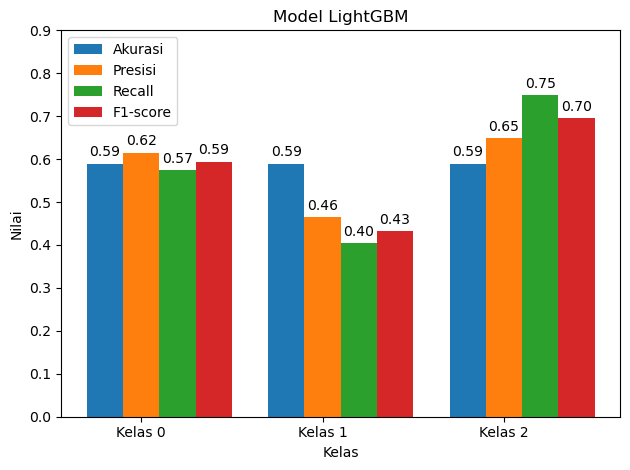

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.5897887323943662
precision = [0.61538462, 0.46451613, 0.64980545]
recall = [0.5748503, 0.40449438, 0.74887892]
f1 = [0.59442724, 0.43243243, 0.69583333]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model LightGBM')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 0.9])
plt.tight_layout()
plt.show()

In [15]:
print(dataset.isnull().sum())

HomeTeam    0
AwayTeam    0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
HTHG        0
HTAG        0
FTR         0
dtype: int64


In [16]:
abFrance = AdaBoostClassifier(random_state=10, learning_rate=0.20)
abFrance.fit(X_train, y_train)
abFrance_pred = abFrance.predict(X_test)
print(abFrance_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, abFrance_pred)*100)

[1 2 2 1 2 0 1 2 1 2 0 2 2 2 2 0 1 2 2 1 2 2 0 2 2 2 2 2 1 2 2 0 2 1 0 0 2
 2 2 1 1 2 0 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1 0 0 1 1
 2 0 2 2 1 2 2 0 1 0 2 1 1 1 2 0 1 2 0 0 2 0 2 2 2 0 2 0 2 2 2 1 2 0 0 2 2
 1 1 0 2 2 2 1 2 0 2 1 2 1 1 0 2 2 2 0 2 2 2 1 2 2 2 1 2 1 1 1 1 1 0 2 2 1
 0 0 1 2 0 2 2 2 2 2 0 2 2 1 2 0 2 1 2 0 0 2 2 0 2 0 2 0 1 0 2 0 2 0 2 1 2
 1 2 0 2 2 2 2 2 1 2 0 0 0 2 2 2 2 1 2 1 2 2 1 2 2 0 2 2 0 2 2 1 0 2 1 0 1
 1 0 2 2 0 2 0 1 0 2 1 2 0 0 1 1 2 1 2 2 1 1 0 2 1 1 2 0 2 1 1 1 1 1 1 1 2
 2 0 1 2 0 2 1 0 2 2 1 2 1 2 1 2 2 2 2 2 0 1 2 2 2 0 1 2 1 1 2 2 0 2 2 0 1
 2 2 1 0 2 2 0 2 2 0 2 1 0 2 0 1 2 1 1 2 2 2 0 0 2 0 0 2 2 1 2 1 2 0 0 2 0
 1 1 1 0 0 0 1 1 1 0 2 2 1 0 1 1 1 2 2 0 1 0 2 2 2 0 2 2 0 2 1 2 0 0 2 0 0
 2 2 0 1 1 1 2 1 1 2 0 2 1 0 2 1 0 1 1 2 2 2 0 2 1 0 1 2 2 2 0 1 2 0 1 2 1
 0 2 0 1 2 2 2 1 2 0 2 2 2 2 1 1 2 2 2 0 2 2 1 0 1 0 2 2 2 2 2 2 1 1 2 0 1
 0 2 0 0 2 1 2 0 0 2 2 2 2 2 0 2 0 2 1 1 2 2 2 1 2 2 2 1 2 0 1 2 1 2 2 1 2
 1 2 0 2 2 0 0 0 1 2 2 0 

In [17]:
print(classification_report(y_test,abFrance_pred))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       167
           1       0.49      0.41      0.45       178
           2       0.62      0.76      0.69       223

    accuracy                           0.59       568
   macro avg       0.59      0.58      0.58       568
weighted avg       0.59      0.59      0.59       568



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, abFrance_pred)

# Menghitung presisi untuk masing-masing kelas
precision = precision_score(y_test, abFrance_pred, average=None)

# Menghitung recall untuk masing-masing kelas
recall = recall_score(y_test, abFrance_pred, average=None)

# Menghitung F1-score untuk masing-masing kelas
f1 = f1_score(y_test, abFrance_pred, average=None)

print("AdaBoost")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AdaBoost
Akurasi: 0.5933098591549296
Presisi: [0.64383562 0.48993289 0.62271062]
Recall: [0.56287425 0.41011236 0.76233184]
F1-score: [0.60063898 0.44648318 0.68548387]


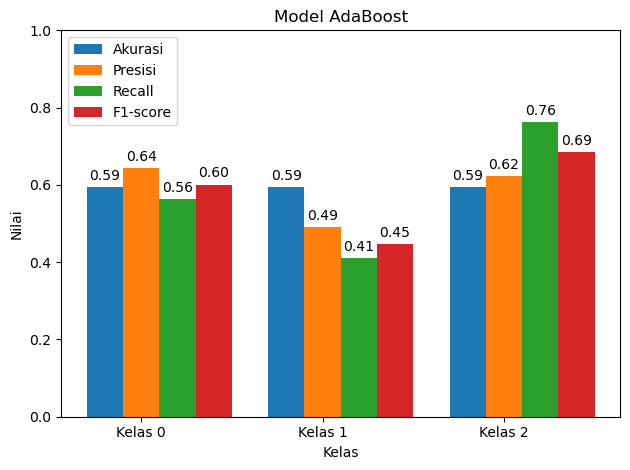

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh nilai akurasi, presisi, recall, dan F1-score untuk 3 kelas
accuracy = 0.5933098591549296
precision = [0.64383562, 0.48993289, 0.62271062]
recall = [0.56287425, 0.41011236, 0.76233184]
f1 = [0.60063898, 0.44648318, 0.68548387]

# Daftar label kelas
labels = ['Kelas 0', 'Kelas 1', 'Kelas 2']

# Membuat grafik
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects_accuracy = ax.bar(x, accuracy, width, label='Akurasi')
rects_precision = ax.bar(x + width, precision, width, label='Presisi')
rects_recall = ax.bar(x + 2 * width, recall, width, label='Recall')
rects_f1 = ax.bar(x + 3 * width, f1, width, label='F1-score')

# Menambahkan label dan judul grafik
ax.set_ylabel('Nilai')
ax.set_xlabel('Kelas')
ax.set_title('Model AdaBoost')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan nilai pada setiap bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects_accuracy)
autolabel(rects_precision)
autolabel(rects_recall)
autolabel(rects_f1)

plt.ylim([0, 1.0])
plt.tight_layout()
plt.show()

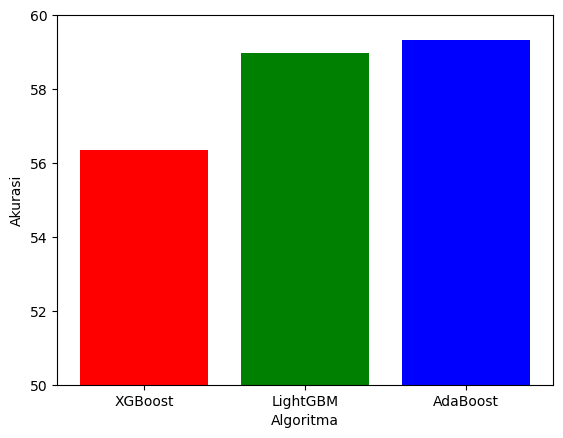

In [20]:
import matplotlib.pyplot as plt

# Data hasil akurasi algoritma
algoritma = ['XGBoost', 'LightGBM', 'AdaBoost']
akurasi = [56.33802816901409, 58.97887323943662, 59.33098591549296]

# Warna untuk setiap batang
colors = ['red', 'green', 'blue']

# Membuat diagram batang dengan warna yang ditentukan
plt.bar(algoritma, akurasi, color=colors)

# Memberikan judul dan label sumbu
#plt.title('Hasil Akurasi Dengan Data Liga Spanyol')
plt.xlabel('Algoritma')
plt.ylabel('Akurasi')

# Mengatur batas sumbu y pada rentang 0 hingga 100
plt.ylim(50, 60)

# Menampilkan diagram batang
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

print("Model XGBoost\n", confusion_matrix(y_test, grFrance_pred))
print("\n")
print("Model LightGBM\n", confusion_matrix(y_test, lgbFrance_pred))
print("\n")
print("Model AdaBoost\n", confusion_matrix(y_test, abFrance_pred))

Model XGBoost
 [[ 94  42  31]
 [ 52  61  65]
 [ 14  44 165]]


Model LightGBM
 [[ 96  41  30]
 [ 46  72  60]
 [ 14  42 167]]


Model AdaBoost
 [[ 94  36  37]
 [ 39  73  66]
 [ 13  40 170]]


Menyimpan Model

In [22]:
import pickle

In [23]:
filename = 'france.sav'
pickle.dump(abFrance, open(filename, 'wb'))